# DS 3000 - Assignment 4

**Student Name**: [Julia Ouritskaya]

**Date**: [9/28/2023]


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Data Science Problem (50 pts)
### Instructions

You are hired as a Data Scientist for the NYC Taxi and Limousine Commission (TLC) and this company routinely collects trip data from all licensed cabs in NY. Your team would like to use this data in the future to understand how New Yorkers use these taxis. Your first assignment is to **analyze the data of the Green Taxis, and determine if its a viable source.**

Your supervisor has requested that you perform your analysis using data from February 2020 and would like for you to present your findings during the next team meeting. Use a Jupyter notebook to explain your data wrangling and analytical steps to your colleagues. 

**Data & Documentation**

- **Data Source:** https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2020-02.parquet
- **Data Dictionary:** [Green Trips Data Dictionary](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf).

The TLC trip record data and a description of the initiative can be found at the following link: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

**`Note:`** Ensure that you explain the results from each question.


**In this assignment you will use the Pandas library. Pandas allows us to load data that's stored in a various formats, e.g. excel, csv, txt, parquet, etc. In this assignment, you will learn to read data in parquet format which is one of the preferred formats when working with `Big Data`. [Click here to learn more about parquet files](https://towardsdatascience.com/csv-files-for-storage-no-thanks-theres-a-better-option-72c78a414d1d)**

I also provided starter code below to help you to read the data in parquet format. First, you'll need to install a new library called *fastparquet*.

In [1]:
#run this cell to install the fast parquet library
!pip install fastparquet

In [2]:
import pandas as pd

## 1. Load the data
Load the NYC Green Taxi Trip Records data directly from the URL into a data frame called tripdata_df. 

In [3]:
#let's load the data into a dataframe

tripdata_df = pd.read_parquet(path = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2020-02.parquet', #provide the URL to the data source
                      engine = 'fastparquet')

#Note: you'll notice two new things. 1) We are using a new function called `read_parquet()` which indicates that we are 
#      reading data in parquet format. 2) We used the fastparquet library as the engine. 
#      That's it! Pandas will load the data into a dataframe. You can now use the dataframe for EDA.

# Reminder: How does Pandas read other file formats?
# 1. Excel files: pd.read_excel()
# 2. CSV Files: pd.read_csv()
# ... and now you know how to read parquet files using pd.read_parquet()


## 2. Inspect the Data (3 pts) 
Inspect the data to: 1) identify its dimensions, and 2) indicate if the variables have suitable types.

In [4]:
#inspect the data to identify its dimensions
tripdata_df.shape

(398632, 20)

The dataset has 398,632 observations (rows) and 20 variables (columns).

In [5]:
#inspect the data to indicate if the variables have suitable types
tripdata_df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

1. `store_and_fwd_flag` could be represented as a boolean or string for "Y" and "N".
2. `RateCodeID` could be represented as an integer, since each code corresponds to a whole number from 1 to 6.
3. `passenger_count` could be represented as an integer, because a taxi cannot have a fraction of a passenger.
4. `payment_type` could be represented as an integer, because it corresponds to a numeric code 1 to 6. 

## 3. Missing Values (5 pts) 
Evaluate the frequency of missing values in the dataset. Are missing values an isolated case or a widespread issue? What method would you recommend to handle missing data?

In [6]:
#evaluate the frequency of missing values in the dataset
tripdata_df.isnull().sum()

VendorID                      0
lpep_pickup_datetime          0
lpep_dropoff_datetime         0
store_and_fwd_flag        80893
RatecodeID                80893
PULocationID                  0
DOLocationID                  0
passenger_count           80893
trip_distance                 0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
ehail_fee                398632
improvement_surcharge         0
total_amount                  0
payment_type              80893
trip_type                 80894
congestion_surcharge      80893
dtype: int64

Cells with significant missing data: `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `ehail_fee`, `payment_type`, `trip_type`, `congestion_surcharge`

In [7]:
#evaluate if missing values are an isolated case or a widespread issue by counting the frequency of missing values in each row (i.e. how many columns are empty)
tripdata_df.isnull().sum(axis=1).sort_values(ascending = False)

398631    7
344706    7
344699    7
344700    7
344701    7
         ..
132875    1
132874    1
132873    1
132872    1
199316    1
Length: 398632, dtype: int64

Isolation vs. Widespread: The missing values seem to be a widespread issue across many rows with data missing across several columns (up to 7).

Recommendations: 
- `ehail_fee`: Can be deleted as this column has all missing values.
- `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`, `trip_type`, `congestion_surcharge`: Use imputation on missing values. 


## 4. Types of Data (5 pts) 
Are there any categorical data in this dataset. If they exist, identify at least two variables and indicate if  they are nominal or ordinal (hint: read the data dictionary above which describes all field in the data)

Yes, there is categorical data in this dataset based on the data dictionary. 

1. `VendorID`: nominal – codes are either '1' or '2'
2. `RateCodeID`: ordinal – codes rank from '1' to '6'
3. `Store_and_fwd_flag`: nominal – codes are 'Y' or 'N'
4. `Payment_type`: nominal – codes range from credit card to voided trip
5. `Trip_type`: nominal – codes are '1' (street-hail) or '2' (dispatch)

## 5. Invalid Data (5 pts) 
Explore the data to determine if there are any invalid values. Demonstrate at least three issues that you found.

In [8]:
tripdata_df[tripdata_df["fare_amount"] < 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
225,2,2020-02-01 00:46:14,2020-02-01 00:48:00,N,1.0,77,77,1.0,0.43,-3.50,-0.50,-0.5,0.0,0.00,NaN,-0.3,-4.80,3.0,1.0,0.0
683,2,2020-02-01 01:32:39,2020-02-01 01:34:32,N,5.0,134,134,1.0,0.00,-25.00,0.00,0.0,0.0,0.00,NaN,0.0,-25.00,4.0,2.0,0.0
996,2,2020-02-01 02:45:38,2020-02-01 02:46:06,N,1.0,7,7,1.0,0.11,-2.50,-0.50,-0.5,0.0,0.00,NaN,-0.3,-3.80,3.0,1.0,0.0
1043,2,2020-02-01 02:42:26,2020-02-01 02:44:45,N,1.0,7,7,1.0,0.51,-4.00,-0.50,-0.5,0.0,0.00,NaN,-0.3,-5.30,3.0,1.0,0.0
1086,2,2020-02-01 02:05:00,2020-02-01 02:08:33,N,1.0,41,41,1.0,0.50,-4.50,-0.50,-0.5,0.0,0.00,NaN,-0.3,-5.80,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372617,2,2020-02-20 16:06:00,2020-02-20 16:21:00,None,NaN,181,181,NaN,0.91,-32.91,2.75,0.0,0.0,0.00,NaN,0.3,-29.86,NaN,NaN,NaN
393029,2,2020-02-27 18:49:00,2020-02-27 19:05:00,None,NaN,26,26,NaN,1.67,-0.91,2.75,0.0,0.0,13.75,NaN,0.3,15.89,NaN,NaN,NaN
394865,2,2020-02-28 11:47:10,2020-02-28 11:50:00,None,NaN,242,242,NaN,0.13,-15.75,0.00,0.5,0.0,0.00,NaN,0.3,-15.25,NaN,NaN,NaN
396278,2,2020-02-28 18:13:00,2020-02-28 18:20:00,None,NaN,35,76,NaN,0.87,-46.05,2.75,0.0,0.0,0.00,NaN,0.3,-43.00,NaN,NaN,NaN


In [9]:
tripdata_df[tripdata_df["fare_amount"] < 0].shape[0]

1153

Issue 1: There are 1,153 observations with a negative `fare_amount` which does not make sense.

In [10]:
tripdata_df[~tripdata_df["RatecodeID"].isin([1, 2, 3, 4, 5, 6])]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
24243,1,2020-02-03 11:19:29,2020-02-03 11:19:29,N,99.0,264,264,0.0,0.00,23.00,0.00,0.0,4.7,0.00,NaN,0.3,28.00,1.0,NaN,0.0
69173,2,2020-02-07 13:57:50,2020-02-07 14:02:38,N,99.0,193,193,1.0,0.00,2.50,0.80,0.5,0.0,0.00,NaN,0.0,3.80,2.0,1.0,0.0
317739,2,2020-02-01 00:29:00,2020-02-01 01:12:00,None,NaN,97,205,NaN,17.28,49.35,2.75,0.0,0.0,0.00,NaN,0.3,52.40,NaN,NaN,NaN
317740,2,2020-02-01 00:27:00,2020-02-01 00:53:00,None,NaN,76,83,NaN,6.83,36.45,2.75,0.0,0.0,0.00,NaN,0.3,39.50,NaN,NaN,NaN
317741,2,2020-02-01 00:21:00,2020-02-01 00:39:00,None,NaN,226,159,NaN,5.68,23.89,2.75,0.0,0.0,6.12,NaN,0.3,33.06,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398627,2,2020-02-29 23:51:00,2020-03-01 00:17:00,None,NaN,203,177,NaN,9.98,43.45,2.75,0.0,0.0,0.00,NaN,0.3,46.50,NaN,NaN,NaN
398628,2,2020-02-29 23:07:00,2020-02-29 23:20:00,None,NaN,91,71,NaN,2.48,17.94,2.75,0.0,0.0,0.00,NaN,0.3,20.99,NaN,NaN,NaN
398629,2,2020-02-29 23:48:00,2020-02-29 23:57:00,None,NaN,35,61,NaN,2.08,13.98,5.50,0.0,0.0,0.00,NaN,0.3,19.78,NaN,NaN,NaN
398630,2,2020-02-29 23:05:00,2020-02-29 23:33:00,None,NaN,157,217,NaN,4.20,31.05,2.75,0.0,0.0,0.00,NaN,0.3,34.10,NaN,NaN,NaN


In [11]:
tripdata_df[~tripdata_df["RatecodeID"].isin([1, 2, 3, 4, 5, 6])].shape[0]

80895

Issue 2: There are 80,895 observations with a `RatecodeID` with values not in the range from 1 to 6.

In [12]:
tripdata_df[(tripdata_df["passenger_count"] > 7) | (tripdata_df["passenger_count"] <= 0)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
21,2,2020-02-01 00:31:56,2020-02-01 00:32:01,N,5.0,198,198,0.0,0.01,20.0,0.00,0.0,2.00,0.0,NaN,0.3,22.30,1.0,2.0,0.00
484,2,2020-02-01 01:19:18,2020-02-01 01:20:40,N,5.0,260,260,8.0,0.33,8.0,0.00,0.0,0.00,0.0,NaN,0.3,8.30,1.0,2.0,0.00
852,2,2020-02-01 02:14:46,2020-02-01 02:14:49,N,5.0,61,61,0.0,0.00,35.0,0.00,0.0,7.00,0.0,NaN,0.0,42.00,1.0,2.0,0.00
1327,2,2020-02-01 04:43:02,2020-02-01 04:43:52,N,5.0,223,223,0.0,0.00,8.8,0.00,0.0,1.82,0.0,NaN,0.3,10.92,1.0,2.0,0.00
1398,1,2020-02-01 04:21:13,2020-02-01 04:43:21,N,1.0,36,79,0.0,5.40,20.0,3.25,0.5,0.00,0.0,NaN,0.3,24.05,2.0,1.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314568,2,2020-02-29 19:43:33,2020-02-29 19:43:36,N,5.0,244,264,0.0,0.00,12.5,0.00,0.0,3.20,0.0,NaN,0.3,16.00,1.0,2.0,0.00
315304,2,2020-02-29 20:39:27,2020-02-29 20:39:29,N,5.0,74,74,0.0,0.00,10.0,0.00,0.0,2.58,0.0,NaN,0.3,12.88,1.0,2.0,0.00
317042,1,2020-02-29 22:50:02,2020-02-29 23:05:09,N,1.0,74,239,0.0,3.40,13.5,3.25,0.5,0.00,0.0,NaN,0.3,17.55,2.0,1.0,2.75
317261,2,2020-02-29 23:39:43,2020-02-29 23:39:45,N,5.0,180,264,0.0,0.00,35.0,0.00,0.0,7.06,0.0,NaN,0.3,42.36,1.0,2.0,0.00


In [13]:
tripdata_df[(tripdata_df["passenger_count"] > 7) | (tripdata_df["passenger_count"] <= 0)].shape[0]

473

Issue 3: There are 473 observations with a `passenger_count` value greater than 7 or less than or equal to 0, which does not make sense for a taxi ride.

## 6. Data Preparation (15 pts) 
Based on the issues that you identified in questions 2, 3 & 5 above, perform the appropriate steps to clean the data and prepare the data for analysis. 


In [14]:
#handle missing data -- imputation
tripdata_df['store_and_fwd_flag'].value_counts(dropna=False)

N       316829
None     80893
Y          910
Name: store_and_fwd_flag, dtype: int64

In [15]:
tripdata_df['store_and_fwd_flag'].replace('None', 'N', inplace=True)

In this dataset, most `store_and_fwd_flag` is 'N' so I replaced all missing `store_and_fwd_flag` with 'N' because it was the most frequently occuring value.

In [16]:
#handle missing data -- imputation
tripdata_df['RatecodeID'].fillna(tripdata_df['RatecodeID'].median(), inplace=True)
tripdata_df['passenger_count'].fillna(tripdata_df['passenger_count'].median(), inplace=True)
tripdata_df['payment_type'].fillna(tripdata_df['payment_type'].median(), inplace=True)
tripdata_df['trip_type'].fillna(tripdata_df['trip_type'].median(), inplace=True)
tripdata_df['congestion_surcharge'].fillna(tripdata_df['congestion_surcharge'].median(), inplace=True)

In this dataset, I imputed the missing values with the median for these columns.

In [17]:
#handle missing data -- deletion
tripdata_df.drop(columns=['ehail_fee'], inplace=True)

The column `ehail_fee` has all values missing, so I dropped it.

In [18]:
#handle invalid data

#remove rows with a negative fare_amount
tripdata_df = tripdata_df[tripdata_df['fare_amount'] > 0]

#set invalid RatecodeID values to the mode
valid_ratecodes = [1, 2, 3, 4, 5, 6]
mode_ratecode = tripdata_df['RatecodeID'].mode()[0]
tripdata_df.loc[~tripdata_df['RatecodeID'].isin(valid_ratecodes), 'RatecodeID'] = mode_ratecode

#set passenger_count values greater than 7 or less than 1 to the mode
mode_passenger_count = tripdata_df['passenger_count'].mode()[0]
tripdata_df.loc[(tripdata_df['passenger_count'] > 7) | (tripdata_df['passenger_count'] <= 0), 'passenger_count'] = mode_passenger_count


I removed observations with a negative `fare_amount` and corrected any invalid values for `RatecodeID` and `passenger_count`.

In [19]:
#convert fields to a suitable data type
tripdata_df['store_and_fwd_flag'] = tripdata_df['store_and_fwd_flag'].astype('str')
tripdata_df['RatecodeID'] = tripdata_df['RatecodeID'].fillna(0).astype('int')
tripdata_df['passenger_count'] = tripdata_df['passenger_count'].fillna(0).astype('int')
tripdata_df['payment_type'] = tripdata_df['payment_type'].fillna(0).astype('int')


In [20]:
#verify if the change occured
tripdata_df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                        int64
PULocationID                      int64
DOLocationID                      int64
passenger_count                   int64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
payment_type                      int64
trip_type                       float64
congestion_surcharge            float64
dtype: object

Converted fields to suitable data types and verified if the change occured.

In [21]:
#remove any duplicate rows
tripdata_df.drop_duplicates(inplace=True) 

In [22]:
tripdata_df.shape

(396559, 19)

Deleted rows and now have ~1000 less rows.

## 7. Data Analysis (10 pts)
Answer the following question using the prepared data. What is the most expensive and least expensive trip in this dataset and how far did they travel? Explain the results.

In [23]:
#maximum and minimum fare amounts
max_fare = tripdata_df['fare_amount'].max()
min_fare = tripdata_df['fare_amount'].min()

#most and least expensive trip
most_expensive_trip = tripdata_df[tripdata_df['fare_amount'] == max_fare]
least_expensive_trip = tripdata_df[tripdata_df['fare_amount'] == min_fare]

#distance for most and least expensive trip
most_expensive_distance = most_expensive_trip['trip_distance'].iloc[0]  
least_expensive_distance = least_expensive_trip['trip_distance'].iloc[0]

#print results
print(f"The most expensive trip is ${max_fare} and travled for {most_expensive_distance} miles.")
print(f"The least expensive trip is ${min_fare} and traveled for {least_expensive_distance} miles.")

The most expensive trip is $458.0 and travled for 5.03 miles.
The least expensive trip is $0.01 and traveled for 0.0 miles.


The results demonstrate that the most expensive trip is 458.00 with a distance of 5.03 miles while the least expensive trip is 0.01 with a distance of 3.94 miles. The most expensive trip seems very expensive for having only covered 5.03 miles, which could indicate anomalies in the data due to various reasons. 

## 8. Data Visualization (5 pts) 
Create bar charts that show: 1) the most common way that New Yorkers request/hail a cab and 2) the most common drop-off location (display the top 5 locations). Explain the charts.

<Axes: >

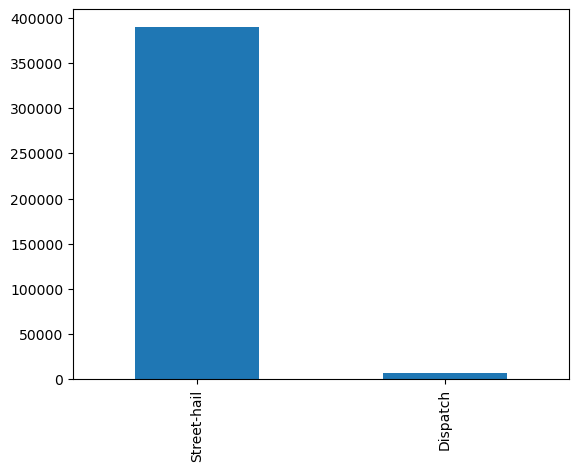

In [24]:
#most common way that New Yorkers request/hail a cab
trip_type_counts = tripdata_df['trip_type'].value_counts()

#convert the numeric values to text
trip_type_counts.index = trip_type_counts.index.map({1: 'Street-hail', 2: 'Dispatch'})

#plot
trip_type_counts.plot(kind='bar')


This chart shows the most common way that New Yorkers request/hail a cab. It can be seen that street-hail is the most common way with over 350,000 observations.

<Axes: >

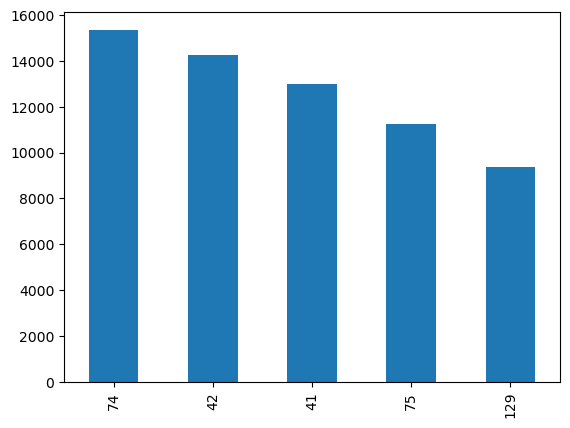

In [25]:
#the most common drop-off location (display the top 5 locatons)
top_five_dropoff = tripdata_df['DOLocationID'].value_counts().head(5)

#plot the bar chart
top_five_dropoff.plot(kind='bar')

This chart shows the most common drop-off location, displaying the top 5 locations. It can be seen that TLC Taxi Zone 74 is the most common drop-off location with over 14,000 observations.

## 9. Findings (2 pts)
Based on the preliminary analysis, is this data a viable source that can be used by your team in the future to understand how New Yorkers use these taxis? Justify your response.

Based on the preliminary analysis, this dataset is a viable source that can be used by my team in the future to understand how New Yorkers use these taxis. Although the dataset required some data cleanup, it covers a lot of important details of taxi rides such as fare amounts, payment methods, pick-up and drop-off locations, and more. For the future, my team could supplement this dataset with other sources to gain a more comprehensive overview on how New Yorkers use taxis.